In [1]:
import networkx as nx
import numpy as np
import scipy as sp
from numpy import linalg as LA
import pandas as pd
import csv
import matplotlib.pylab as plt

Question 2: Social Network Analysis with the Facebook100 Dataset

The smallest network (Caltech) has 762 nodes in the largest connected component (LCC), and the largest has more than 40000 nodes in the LCC.
Lets use three networks from the FB100: Caltech (with 762 nodes in the LCC), MIT (which has 6402 nodes in the LCC), and Johns Hopkins (which has 5157 nodes in the LCC).

(a) For these three networks plot the degree distribution for each of the three net- works that you downloaded. What are you able to conclude from these degree distributions?

(b) Compute the global clustering coefficient and mean local clustering coefficient for each of the two networks. In addition compute the edge density of each network. Should either of these networks be construed as sparse?

(c) For each network, also draw a scatter plot of the degree versus local clustering coefficient. Based on these calculations as well as your previous ones, are you able to draw any conclusions about any similarities or differences between the tree networks? What other observations can you make?


In [2]:
Gcaltech = nx.read_graphml("./fb100/Caltech36.graphml")
Gmit = nx.read_graphml("./fb100/Mit8.graphml")
GjohnsHopkins = nx.read_graphml("./fb100/Johns Hopkins55.graphml")

[1.53203856e-02 1.12138905e-02 7.05474800e-03 3.42207926e-03
 2.00060018e-03 7.37063224e-04 5.26473732e-04 1.05294746e-04
 5.26473732e-05 5.26473732e-05]


Text(0.5, 1.0, 'Degree distribution of Caltech')

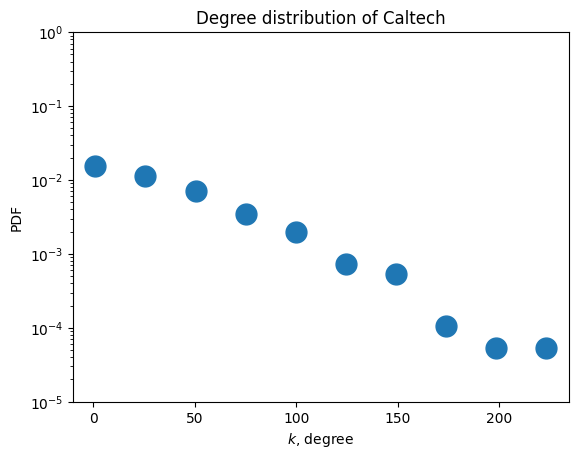

In [3]:
degree_sequence = sorted([d for n, d in Gcaltech.degree()], reverse=True)  # degree sequence
hist, bin_edges = np.histogram(degree_sequence, density=True)
print(hist)
plt.semilogy(bin_edges[:-1], hist, 'o', ms=15)
plt.xlabel(r"$k$, degree ")
plt.ylabel(r"PDF")
plt.ylim(1e-5, 1)
plt.title("Degree distribution of Caltech")

[8.24716456e-03 3.51849737e-03 1.47372767e-03 5.84219913e-04
 1.84490499e-04 7.90673566e-05 1.97668392e-05 1.75705237e-05
 1.31778928e-05 6.58894638e-06]


Text(0.5, 1.0, 'Degree distribution of MIT')

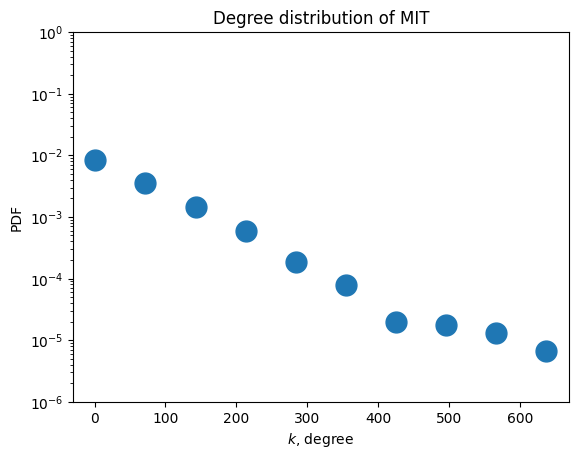

In [4]:
degree_sequence = sorted([d for n, d in Gmit.degree()], reverse=True)  # degree sequence
hist, bin_edges = np.histogram(degree_sequence, density=True)
print(hist)
plt.semilogy(bin_edges[:-1], hist, 'o', ms=15)
plt.xlabel(r"$k$, degree ")
plt.ylabel(r"PDF")
plt.ylim(1e-6, 1)
plt.title("Degree distribution of MIT")

[7.81362476e-03 2.60672295e-03 6.84946448e-04 1.41788277e-04
 3.92644460e-05 8.72543245e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.36271623e-06]


Text(0.5, 1.0, 'Degree distribution of Johns Hopkins')

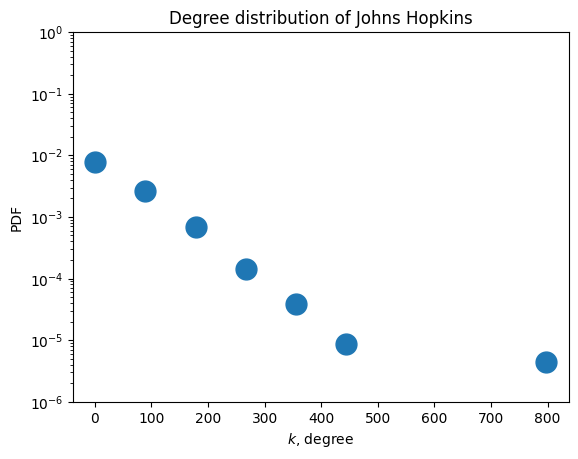

In [5]:
degree_sequence = sorted([d for n, d in GjohnsHopkins.degree()], reverse=True)  # degree sequence
hist, bin_edges = np.histogram(degree_sequence, density=True)
print(hist)
plt.semilogy(bin_edges[:-1], hist, 'o', ms=15)
plt.xlabel(r"$k$, degree ")
plt.ylabel(r"PDF")
plt.ylim(1e-6, 1)
plt.title("Degree distribution of Johns Hopkins")

In [6]:
print(nx.transitivity(Gcaltech))
print(nx.transitivity(Gmit))
print(nx.transitivity(GjohnsHopkins))

0.2912826901150874
0.18028845093502427
0.19316123901594015


In [7]:
print(nx.average_clustering(Gcaltech))
print(nx.average_clustering(Gmit))
print(nx.average_clustering(GjohnsHopkins))

0.40929439048517247
0.2712187419501315
0.26839307371293525


In [8]:
print(nx.density(Gcaltech))
print(nx.density(Gmit))
print(nx.density(GjohnsHopkins))

0.05640442132639792
0.012118119495041378
0.013910200162372396


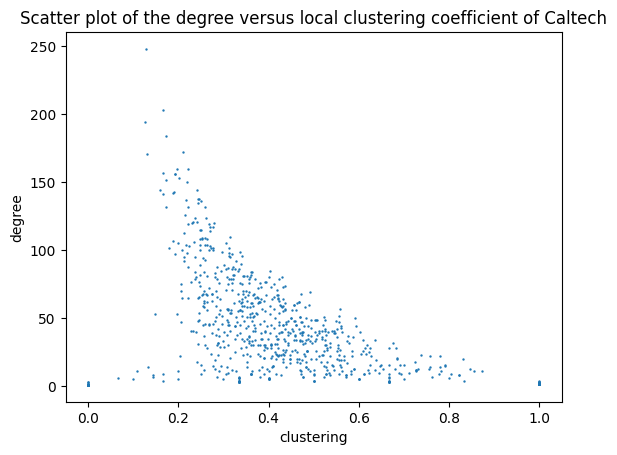

In [19]:
x,y = [],[]
for n,d in Gcaltech.degree():
    x.append(nx.clustering(Gcaltech,n))
    y.append(d)

plt.scatter(x,y,s=0.5)
plt.xlabel("clustering")
plt.ylabel("degree")
plt.title("Scatter plot of the degree versus local clustering coefficient of Caltech")
plt.show()

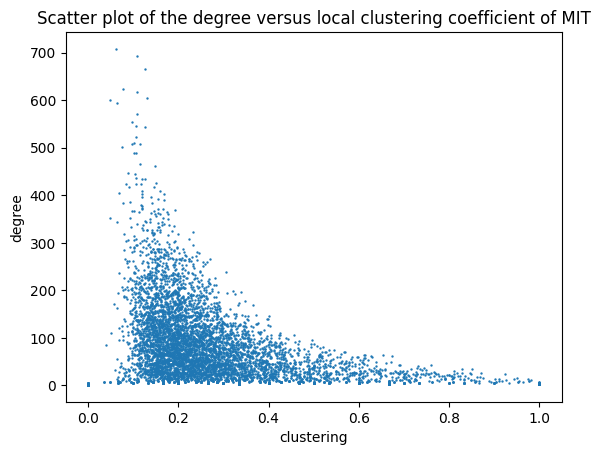

In [20]:
x,y = [],[]
for n,d in Gmit.degree():
    x.append(nx.clustering(Gmit,n))
    y.append(d)

plt.scatter(x,y,s=0.5)
plt.xlabel("clustering")
plt.ylabel("degree")
plt.title("Scatter plot of the degree versus local clustering coefficient of MIT")
plt.show()

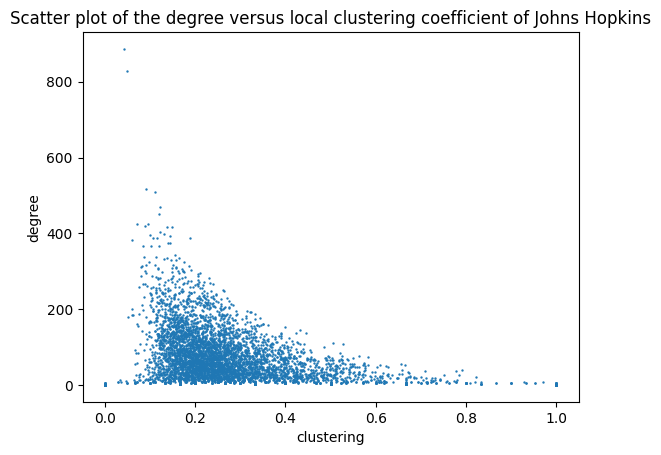

In [21]:
x,y = [],[]
for n,d in GjohnsHopkins.degree():
    x.append(nx.clustering(GjohnsHopkins,n))
    y.append(d)

plt.scatter(x,y,s=0.5)
plt.ylabel("degree")
plt.xlabel("clustering")
plt.title("Scatter plot of the degree versus local clustering coefficient of Johns Hopkins")
plt.show()

Question 3

In [2]:
import os

In [ ]:
G_dict = {}
for graph in os.listdir("./fb100"):
    if graph != "Berkeley13.graphml":
        graph_path = "./fb100/"+graph
        G_dict[graph]=nx.read_graphml(graph_path)


In [ ]:
size = []
status_assortativity = []
for graph in G_dict.values():
    size.append(graph.number_of_nodes())
    status_assortativity.append(nx.attribute_assortativity_coefficient(graph,"student_fac"))
    

In [34]:
G_dict['American75.graphml'].nodes['3']

{'student_fac': 1,
 'gender': 1,
 'major_index': 293,
 'second_major': 308,
 'dorm': 0,
 'year': 2007,
 'high_school': 9720}

In [ ]:
plt.scatter(size,status_assortativity,s=0.5)
plt.xscale("log")
plt.ylabel("status assortativity")
plt.xlabel("size")
plt.title("Scatter plot of the status assortativity versus the size of the graph")
plt.plot(size,[0 for i in size],ls="--")
plt.show()

In [ ]:
print("heloo")